In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**learning about regresion**: Part 1
- Creating a model
- Compilling a model
- fitting a model
- evaluating a model

In [2]:
insurance =  pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [4]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'] )
)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,0.586957,0.247915,0.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.378262,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.293920,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,0.263250,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021739,0.429379,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
263,0.978261,0.514662,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
264,0.869565,0.301587,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
265,0.434783,0.324590,0.2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
266,0.782609,0.846112,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
tf.random.set_seed(42)

model = Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10),
    layers.Dense(1),
])

model.compile(
    loss='mae',
    optimizer=Adam(learning_rate=0.01),
    metrics=['mae'] 
)

In [9]:
history = model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [10]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1785.1730 - mae: 1785.1730


[1785.1729736328125, 1785.1729736328125]

Text(0.5, 0, 'epochs')

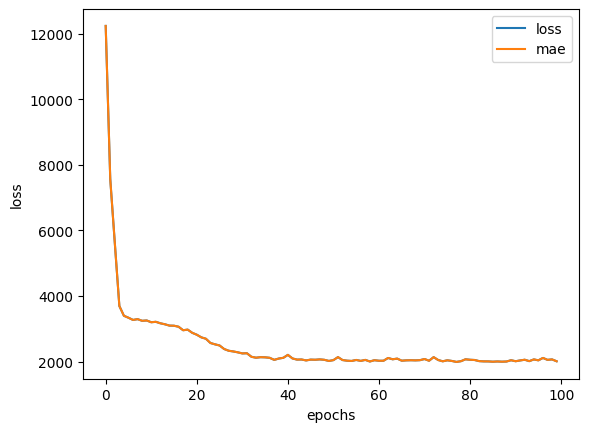

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

9/9 [==============================] - 0s 3ms/step


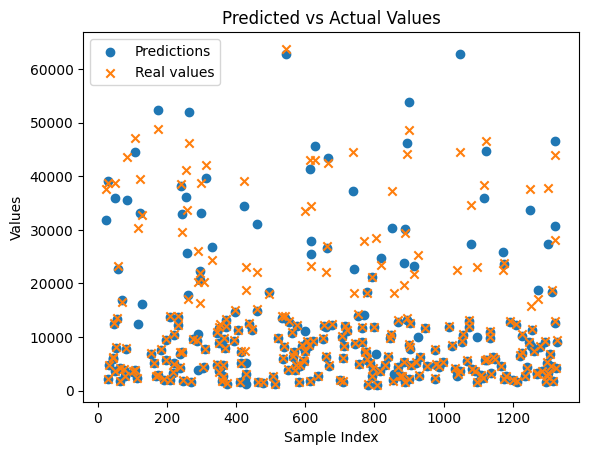

In [34]:
y_predict = model.predict(X_test_normal)
df = pd.DataFrame({'Predicted': y_predict.squeeze(), 'Actual': y_test})

plt.scatter(df.index, df['Predicted'], marker='o', label='Predictions')
plt.scatter(df.index, df['Actual'], marker='x', label='Real values')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12321 (48.13 KB)
Trainable params: 12321 (48.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
